In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# File Path
file_path = r'../raw_data/raw_analyst_ratings.csv'

# Load the dataset with exception handling
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Ensure 'headline' column exists and handle missing values
if 'headline' not in df.columns:
    print("Error: The dataset does not contain a 'headline' column.")
    exit()

# Replace missing values in the 'headline' column
df['headline'] = df['headline'].fillna('')


# Load English stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [word for word in words if word.isalpha()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Preprocess the headlines
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

# Extract frequent keywords/phrases using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=20)  # Unigrams and bigrams
X = vectorizer.fit_transform(df['cleaned_headline'])

# Get the top keywords/phrases
keywords = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Display the keywords and their frequencies
top_keywords = pd.DataFrame({'Keyword': keywords, 'Frequency': frequencies})
top_keywords.sort_values(by='Frequency', ascending=False, inplace=True)
print(top_keywords)

# Plot the top keywords
plt.figure(figsize=(10, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Frequency'], color='skyblue')
plt.title('Top Keywords/Phrases')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Create a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words
).generate(' '.join(df['cleaned_headline']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Headlines')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ufanc\AppData\Local\Temp\ipykernel_29412\4277824384.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['headline'].fillna('', inplace=True)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ufanc/nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\share\\nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\lib\\nltk_data'
    - 'C:\\Users\\ufanc\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data'
**********************************************************************


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'../raw_data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [word for word in words if word.isalpha()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Preprocess the headlines
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

# Extract frequent keywords/phrases using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=20)  # Unigrams and bigrams
X = vectorizer.fit_transform(df['cleaned_headline'])

# Get the top keywords/phrases
keywords = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Display the keywords and their frequencies
top_keywords = pd.DataFrame({'Keyword': keywords, 'Frequency': frequencies})
print(top_keywords)

# Plot the top keywords
top_keywords.sort_values(by='Frequency', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Frequency'], color='skyblue')
plt.title('Top Keywords/Phrases')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Optional: Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_headline']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Headlines')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ufanc/nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\share\\nltk_data'
    - 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\lib\\nltk_data'
    - 'C:\\Users\\ufanc\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data'
**********************************************************************


In [9]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import concurrent.futures

# Function for TextBlob sentiment analysis
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Function for VADER sentiment analysis
def get_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0:
        return 'positive'
    elif score['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

# Load the dataset
file_path = r'../raw_data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Ensure 'headline' column is properly handled
df['headline'] = df['headline'].str.strip()

# Use concurrent.futures to speed up sentiment analysis
with concurrent.futures.ThreadPoolExecutor() as executor:
    df['sentiment_textblob'] = list(executor.map(get_sentiment_textblob, df['headline']))
    df['sentiment_vader'] = list(executor.map(get_sentiment_vader, df['headline']))

# Display the sentiment counts
print("Sentiment counts using TextBlob:")
print(df['sentiment_textblob'].value_counts())
print("\nSentiment counts using VADER:")
print(df['sentiment_vader'].value_counts())


Sentiment counts using TextBlob:
sentiment_textblob
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64

Sentiment counts using VADER:
sentiment_vader
neutral     729942
positive    449856
negative    227530
Name: count, dtype: int64


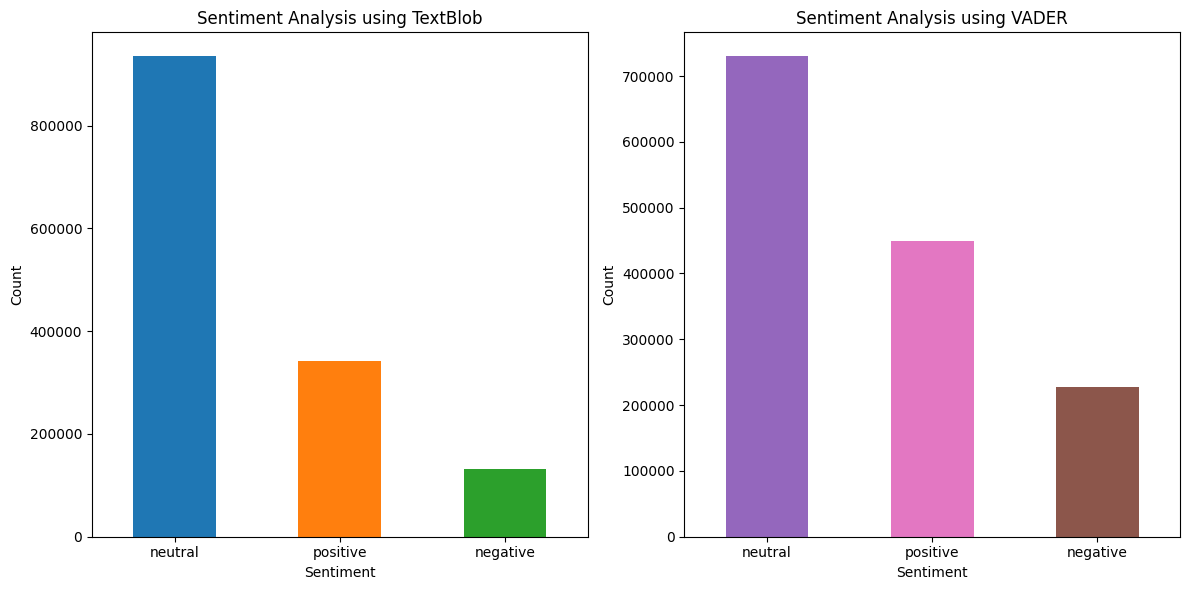

In [12]:
import matplotlib.pyplot as plt

# Count the sentiment distribution
sentiment_counts_textblob = df['sentiment_textblob'].value_counts()
sentiment_counts_vader = df['sentiment_vader'].value_counts()

# Define custom colors for the sentiments
custom_colors_textblob = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
custom_colors_vader = ['#9467bd', '#e377c2', '#8c564b']     # Purple, Pink, Brown

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plot the sentiment distribution using TextBlob
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sentiment_counts_textblob.plot(kind='bar', color=custom_colors_textblob)
plt.title('Sentiment Analysis using TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot the sentiment distribution using VADER
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sentiment_counts_vader.plot(kind='bar', color=custom_colors_vader)
plt.title('Sentiment Analysis using VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
